<a href="https://colab.research.google.com/github/Bhryee/Exploratory_Data_Analysis/blob/main/btk_bisiklet_fiyat_analizi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel("bisiklet_fiyatlari.xlsx")

In [4]:
df.head()

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430


In [5]:
#sns.pairplot(df)

##Veriyi test/train olarak ikiye ayırmak

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
# y = wx + b
#x = feature (özellik)
X = df.drop(columns = "Fiyat").values
X

array([[1749.628226, 1749.590668],
       [1748.007826, 1751.824206],
       [1750.122967, 1747.977026],
       ...,
       [1752.540381, 1747.98331 ],
       [1751.34929 , 1747.484989],
       [1748.656426, 1752.539962]])

In [8]:
#y = label (etiket)
y = df["Fiyat"].values #values demezsek pandas olur. values dersek numpy array (dizisi) olur.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 15)

In [10]:
X_train.shape

(670, 2)

In [11]:
X_test.shape

(330, 2)

##Scaling

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
#X_test

In [15]:
from tensorflow.keras.models import Sequential #modeli oluşturduk

from tensorflow.keras.layers import Dense #model içerisine katmanları koyuyoruz.

In [16]:
model = Sequential()
model.add(Dense(4, activation = "relu")) #5 sayısı nöron sayısı
model.add(Dense(4, activation = "relu"))
model.add(Dense(4, activation = "relu")) #kaç tane gizli katman olmasını istiyorsak o kadar kopyala yapıştır yapıyoruz.

model.add(Dense(1)) #çıktı nöronu

model.compile(optimizer = "rmsprop", loss = "mse") #compile yapılan tüm işlemleri birleştirir. çalıştırmaya hazır hale getirir.
#optimizer = min step-size değeri bulmak
#loss = kayıp, mse = mean squared error

In [17]:
model.fit(X_train, y_train, epochs = 250)

Epoch 1/250
21/21 [==============================] - 1s 2ms/step - loss: 795214.1875
Epoch 2/250
21/21 [==============================] - 0s 2ms/step - loss: 794880.5000
Epoch 3/250
21/21 [==============================] - 0s 2ms/step - loss: 794510.1875
Epoch 4/250
21/21 [==============================] - 0s 2ms/step - loss: 794056.0000
Epoch 5/250
21/21 [==============================] - 0s 2ms/step - loss: 793483.4375
Epoch 6/250
21/21 [==============================] - 0s 2ms/step - loss: 792793.8125
Epoch 7/250
21/21 [==============================] - 0s 2ms/step - loss: 791981.3750
Epoch 8/250
21/21 [==============================] - 0s 2ms/step - loss: 791035.4375
Epoch 9/250
21/21 [==============================] - 0s 2ms/step - loss: 789938.4375
Epoch 10/250
21/21 [==============================] - 0s 2ms/step - loss: 788686.6250
Epoch 11/250
21/21 [==============================] - 0s 3ms/step - loss: 787264.6875
Epoch 12/250
21/21 [==============================] - 0s 2ms/st

In [18]:
loss = model.history.history["loss"] #loss'un değerlerini sözlük içerisinde verir.
# ["loss"] ile sözlükten çıktarıp dize haline getirdik

<Axes: >

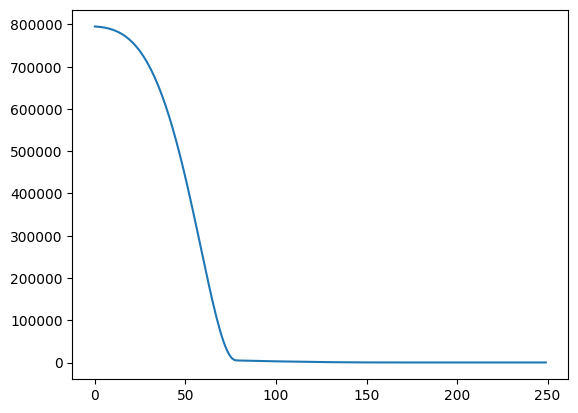

In [19]:
sns.lineplot(x = range(len(loss)), y = loss)

In [20]:
#modeli modelin kendisinin değerlendirmesi
#verbose = yapacağımızın işlemin ne kadar detayını bize geri yazdıracağını sorar. 0 veya 1 veririz.
#train ile test loss'larının birbirine yakın çıkması modelin iyi olduğu anlamına gelir

trainLoss = model.evaluate(X_train, y_train, verbose = 0)

In [21]:
testLoss = model.evaluate(X_test, y_test, verbose = 0)

In [22]:
trainLoss

73.08921813964844

In [23]:
testLoss

77.12116241455078

In [24]:
testTahmini = model.predict(X_test) #predict tahmin etmek

11/11 [==============================] - 0s 2ms/step


In [25]:
testTahmini.shape

(330, 1)

In [26]:
testTahmini = pd.Series(testTahmini.reshape(330,))


In [27]:
testTahmini.head()

0    1077.663452
1     623.518738
2     875.902466
3     893.983582
4     899.239807
dtype: float32

In [28]:
tahminDF = pd.DataFrame(y_test, columns = ["Gerçek Y"])

In [29]:
tahminDF = pd.concat([tahminDF, testTahmini], axis = 1)

In [30]:
tahminDF.columns = ["Gerçek Y", "Tahmin Y"]

In [31]:
tahminDF

,Gerçek Y,Tahmin Y
0,1081.652164,1077.663452
1,622.675990,623.518738
2,889.356810,875.902466
3,902.826733,893.983582
4,897.662404,899.239807
...,...,...
325,1028.438035,1013.407410
326,789.934950,790.540161
327,758.490486,765.718323
328,1172.871659,1167.506958


<Axes: xlabel='Gerçek Y', ylabel='Tahmin Y'>

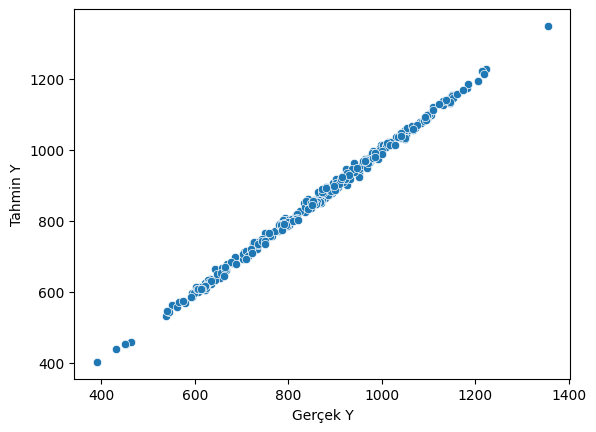

In [32]:
sns.scatterplot(x = "Gerçek Y", y = "Tahmin Y", data = tahminDF)

##Hata Fonksiyonu

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [34]:
mean_squared_error(tahminDF["Gerçek Y"], tahminDF["Tahmin Y"])

77.12117982688915

In [35]:
mean_absolute_error(tahminDF["Gerçek Y"], tahminDF["Tahmin Y"])

7.037434827163824

##Model Tahmini

In [36]:
yenibisiklet = [[1750,1749]]

In [37]:
yenibisiklet = scaler.transform(yenibisiklet)

In [38]:
model.predict(yenibisiklet)

1/1 [==============================] - 0s 21ms/step


array([[785.47296]], dtype=float32)

##Modeli kaydedip sonra çağırmak

In [39]:
from tensorflow.keras.models import load_model

In [40]:
model.save("bisiklet_modeli.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [41]:
sonradan_cagırma = load_model("bisiklet_modeli.h5")

In [42]:
sonradan_cagırma.predict(yenibisiklet)

1/1 [==============================] - 0s 61ms/step


array([[785.47296]], dtype=float32)